# Description

Prepare a prototype machine learning model for The company, which develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore. We have  disposal data with parameters of extraction and cleaning.

The model will help to optimize production.

We need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

In [2]:
#library import
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score,fbeta_score, make_scorer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#### Table of contents. <a id='contents'></a>


1.[About data](#meatdata)

-  1.1. [Train](#train)
-  1.2. [Test](#test)
-  1.3. [All data](#all_data)
-  1.4. [Conclusion](#conclusion_1)

2.[Анализ данных](#analyze)

-  2.1. [Metal change(Au, Ag, Pb)](#metal_change)
-  2.2. [Conclusion](#conclusion_2)
-  2.3. [Feed size  distribution](#feed_size)
-  2.4. [Conclusion](#conclusion_3)
-  2.5. [Sum concentrat of all](#sum_concentrat)
-  2.6. [Conclusion](#conclusion_4)

3.[Model](#model)
-  3.1. [sMape](#smape)
-  3.2. [Train](#models)
-  3.3. [Conclusion](#conclusion_6)
-  3.4. [Test](#modeltest)
-  3.5. [Conclusion](#conclusion_7)

4.[Final conclusion](#contents_final)


# 1. About data<a id='meatdata'></a>

#### Train<a id='tran'></a>

In [3]:
#check data
gold_recovery_train = pd.read_csv('gold_recovery_train.csv')
display(gold_recovery_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
#check recovery
c = gold_recovery_train['rougher.output.concentrate_au']
f = gold_recovery_train['rougher.input.feed_au']
t = gold_recovery_train['rougher.output.tail_au']
gold_recovery_train['recovery_test'] = ((c*(f-t)) /(f*(c-t)))*100

#mae
mae = (gold_recovery_train['recovery_test'] - gold_recovery_train['rougher.output.recovery']).abs().mean()
print('MAE:', mae)

MAE: 9.444891926100695e-15


In [6]:
#check nulls and fill on previous
gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery_test                                 0
Length: 88, dtype: int64

In [7]:
#check duplicates
gold_recovery_train.duplicated().sum()

0

#### Conclusion 

16860 entries and 87 columns.

Recovery tast and mae are done.

I think mae 9 is normal and we can work.

No dublicates. Nulls filedl on previous, because it is possible in process data.

[To contents](#contents)

#### Test<a id='test'></a>

In [8]:
#check data
gold_recovery_test = pd.read_csv('gold_recovery_test.csv')
display(gold_recovery_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
#check, which columns are not in test
train_columns = gold_recovery_train.columns
test_columns = gold_recovery_test.columns
miss_columns=list(set(train_columns) ^ set(test_columns))
display(miss_columns)

['final.output.tail_pb',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_sol',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'recovery_test',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'secondary_cleaner.out

In [11]:
#check nulls and fill on previous
gold_recovery_test = gold_recovery_test.fillna(method='ffill')
gold_recovery_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [12]:
##check duplicates
gold_recovery_test.duplicated().sum()

0

#### Conclusion <a id='conclusion'></a>
5856 entries and 53 columns

No dublicates. Nulls filed on previous, because it is possible in process data.

Test hasn't:
- all tail
- all concentration
- эффективность обогащения для влотации и финальной стадии
- Sulphate in flotation
- Sulphate in gold  in flotation
- au_pb_ratio in flotation
- new recovery_test.

[To contents](#contents)

#### All data<a id='all_data'></a>

In [13]:
#check data
gold_recovery_full = pd.read_csv('gold_recovery_full.csv')
display(gold_recovery_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [14]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [15]:
#check nulls and fill on previous
gold_recovery_full = gold_recovery_full.fillna(method='ffill')
gold_recovery_full.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [16]:
##check duplicates
gold_recovery_test.duplicated().sum()

0

#### Conclusion <a id='conclusion_1'></a>

87 columns and 22716 entries.

No dublicates. Nulls filed on previous, because it is possible in process data.

[To contents](#contents)

# 2. Анализ данных<a id='analyze'></a>

#### Metal change(Au, Ag, Pb) <a id='metal_change'></a>

In [18]:
#table for au
au_change = pd.DataFrame(gold_recovery_full[{'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                                             'final.output.concentrate_au'}]) 
display(au_change.head())

,rougher.output.concentrate_au,final.output.concentrate_au,primary_cleaner.output.concentrate_au
0,19.793808,42.192020,34.174427
1,20.050975,42.701629,34.118526
2,19.737170,42.657501,33.969464
3,19.320810,42.689819,28.260743
4,19.216101,42.774141,33.044932


In [19]:
#check mean
mean_rougher_au = au_change['rougher.output.concentrate_au'].mean()
mean_primary_au = au_change['primary_cleaner.output.concentrate_au'].mean()
mean_final_au = au_change['final.output.concentrate_au'].mean()
display('mean after flotation:',mean_rougher_au)
display('mean after primary cleaner:',mean_primary_au)
display('mean after secondary cleaner:',mean_final_au)

'mean after flotation:'

17.831508880484446

'mean after primary cleaner:'

29.119966533637392

'mean after secondary cleaner:'

39.891717823169685

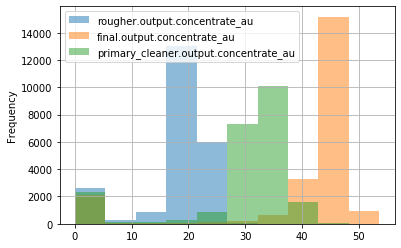

In [18]:
#graph
au_change.plot(kind='hist',legend=True, grid = 'true', alpha = 0.5)

In [19]:
#table for ag

ag_change = pd.DataFrame(gold_recovery_full[{'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                                                'final.output.concentrate_ag'}])
display(ag_change.head())

,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.output.concentrate_ag
0,8.547551,6.055403,11.500771
1,8.558743,6.029369,11.615865
2,8.603505,6.055926,11.695753
3,7.221879,6.047977,11.915047
4,9.089428,6.148599,12.411054


In [20]:
#check mean
mean_rougher_ag = ag_change['rougher.output.concentrate_ag'].mean()
mean_primary_ag = ag_change['primary_cleaner.output.concentrate_ag'].mean()
mean_final_ag = ag_change['final.output.concentrate_ag'].mean()
display('mean after flotation:',mean_rougher_ag)
display('mean after primary cleaner:',mean_primary_ag)
display('mean after secondary cleaner:',mean_final_ag)

'mean after flotation:'

10.845609432117566

'mean after primary cleaner:'

7.666971769305148

'mean after secondary cleaner:'

4.768012876038166

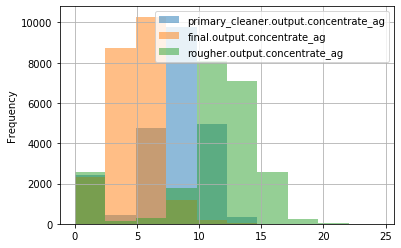

In [21]:
#graph
ag_change.plot(kind='hist',legend=True, grid = 'true', alpha = 0.5)

In [22]:
#table for pb
pb_change = pd.DataFrame(gold_recovery_full[{'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                                             'final.output.concentrate_pb'}])
display(pb_change.head())

,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb,final.output.concentrate_pb
0,10.389648,7.101074,9.889648
1,10.497069,7.278807,9.968944
2,10.354494,7.216833,10.213995
3,8.496563,7.175616,9.977019
4,9.986786,7.240205,10.142511


In [23]:
##check mean
mean_rougher_pb = pb_change['rougher.output.concentrate_pb'].mean()
mean_primary_pb = pb_change['primary_cleaner.output.concentrate_pb'].mean()
mean_final_pb = pb_change['final.output.concentrate_pb'].mean()
display('mean after flotation:',mean_rougher_pb)
display('mean after primary cleaner:',mean_primary_pb)
display('mean after secondary cleaner:',mean_final_pb)

'mean after flotation:'

6.8868694642608235

'mean after primary cleaner:'

8.809217456953947

'mean after secondary cleaner:'

9.071366208756285

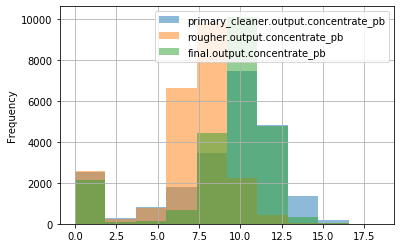

In [24]:
#graph
pb_change.plot(kind='hist',legend=True, grid = 'true', alpha = 0.5)

In [25]:
#total table
mean_change = pd.DataFrame({'metal':['au','ag','pb'],'rougher':[mean_rougher_au,mean_rougher_ag,mean_rougher_pb], 'primary':[mean_primary_au, mean_primary_ag, mean_primary_pb], 'final':[mean_final_au,mean_final_ag,mean_final_pb]})

display(mean_change)

,metal,rougher,primary,final
0,au,17.831509,29.119967,39.891718
1,ag,10.845609,7.666972,4.768013
2,pb,6.886869,8.809217,9.071366


#### Conclusion  <a id='conclusion_2'></a>
Gold ratio is growing at each stage, it is good, we made it here


The silver concentration has decreased slightly more than 2 times, good.

Lead is growing, due to a processing feature, I think.

[To contents](#contents)

#### Feed size  distribution <a id='feed_size'></a>

In [20]:
#table for flotation
rougher_feed_size = pd.DataFrame(gold_recovery_train['rougher.input.feed_size'])
rougher_feed_size['test'] = gold_recovery_test['rougher.input.feed_size']
rougher_feed_size.columns = ['train_rougher_feed_size','test_rougher_feed_size']
rougher_feed_size = rougher_feed_size.fillna(method='ffill')

display(rougher_feed_size.head())

,train_rougher_feed_size,test_rougher_feed_size
0,55.486599,62.710452
1,57.278666,61.961163
2,57.510649,66.903807
3,57.792734,59.865919
4,56.047189,63.315324


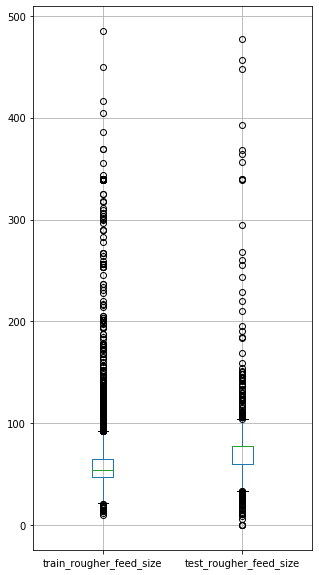

In [27]:
rougher_feed_size.boxplot(figsize = (5, 10))

In [21]:
#table for primary cleaner
primary_feed_size = pd.DataFrame(gold_recovery_train['primary_cleaner.input.feed_size'])
primary_feed_size['test'] = gold_recovery_test['primary_cleaner.input.feed_size']
primary_feed_size.columns = ['train_primary_feed_size','test_primary_feed_size']
primary_feed_size = primary_feed_size.fillna(method='ffill')

display(primary_feed_size.head())

,train_primary_feed_size,test_primary_feed_size
0,7.25,8.080000
1,7.25,8.080000
2,7.25,7.786667
3,7.25,7.640000
4,7.25,7.530000


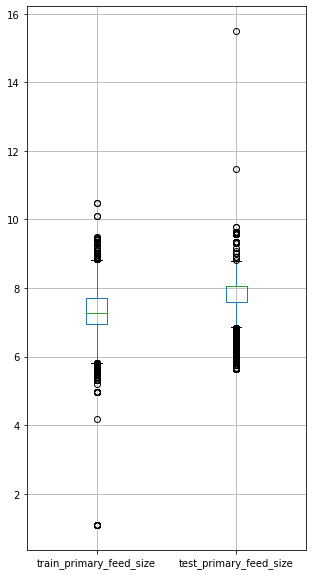

In [29]:
primary_feed_size.boxplot(figsize = (5, 10))

#### Conclusion <a id='conclusion_3'></a>

I think emissions are normal. They are similar and they are not much. 

[To contents](#contents)

#### Sum concentrat of all <a id='sum_concentrat'></a>

In [22]:
#ag concentrat
ag_concentrat = pd.DataFrame(gold_recovery_full[['rougher.input.feed_ag','rougher.output.concentrate_ag',
                                                 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']])
display(ag_concentrat.head())

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


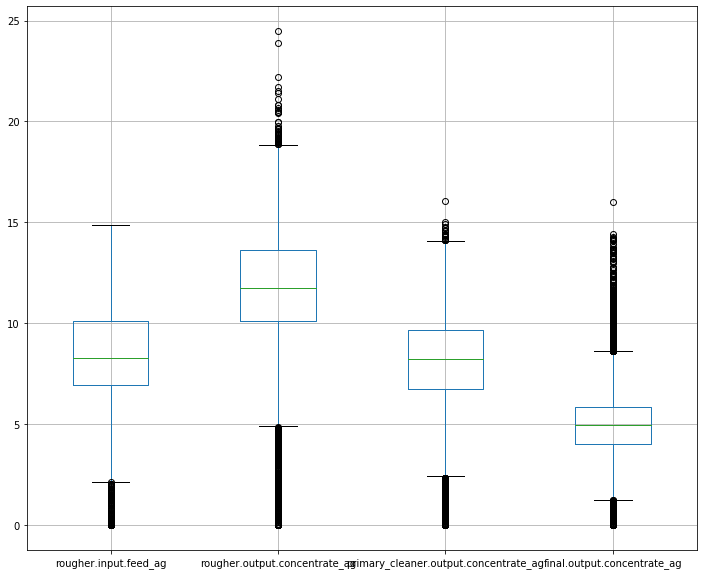

In [31]:
ag_concentrat.boxplot(figsize = (12, 10))

#### Conclusion

We have knock-out values at the stage of exit during flotation and of the exit after the first cleaning and the final one.

In [23]:
#concentrat sol
sol_concentrat = pd.DataFrame(gold_recovery_full[{'rougher.input.feed_sol','rougher.output.concentrate_sol',
                                                 'primary_cleaner.output.concentrate_sol','final.output.concentrate_sol'}])
display(sol_concentrat.head())

,primary_cleaner.output.concentrate_sol,rougher.input.feed_sol,final.output.concentrate_sol,rougher.output.concentrate_sol
0,19.529297,36.808594,5.507324,28.029297
1,19.369147,35.753385,5.257781,28.067063
2,19.167579,35.971630,5.383759,27.454037
3,15.978538,36.862241,4.858634,27.341277
4,19.199864,34.347666,4.939416,27.041023


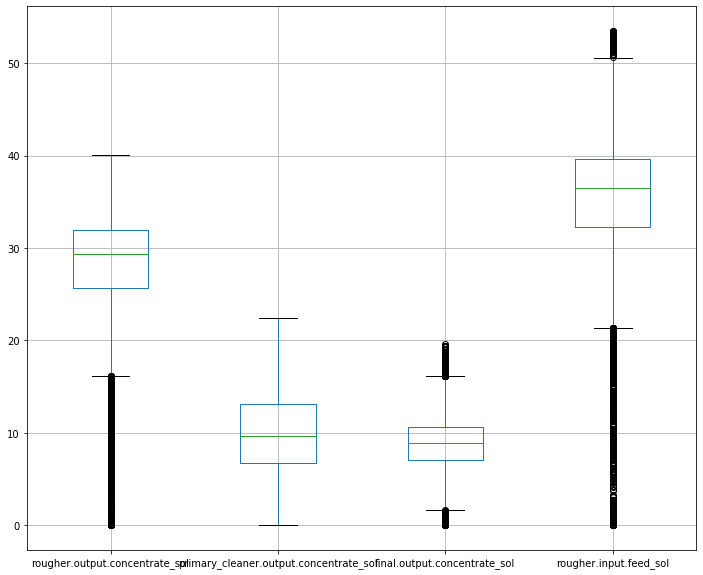

In [33]:
sol_concentrat.boxplot(figsize = (12, 10))

#### Conclusion
All is good.

In [34]:
#concentrat pb
pb_concentrat = pd.DataFrame(gold_recovery_full[{'rougher.input.feed_pb','rougher.output.concentrate_pb',
                                                 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'}])
display(pb_concentrat.head())

,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb,final.output.concentrate_pb
0,10.389648,2.284912,7.101074,9.889648
1,10.497069,2.266033,7.278807,9.968944
2,10.354494,2.159622,7.216833,10.213995
3,8.496563,2.037807,7.175616,9.977019
4,9.986786,1.786875,7.240205,10.142511


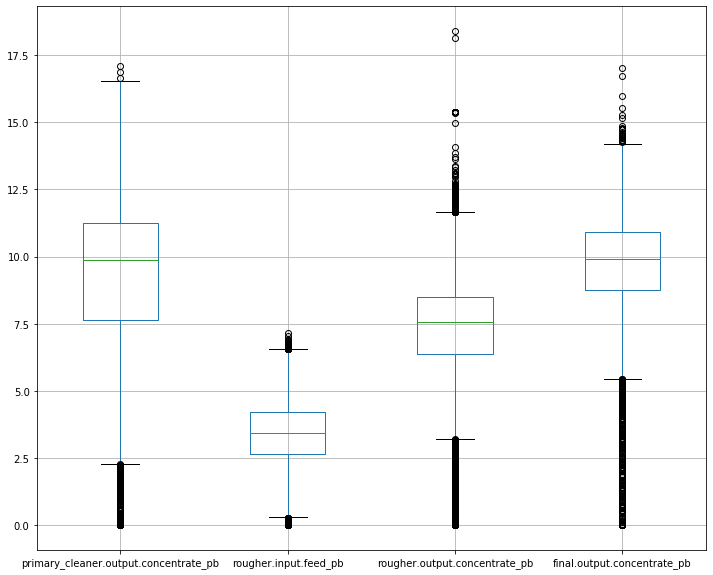

In [35]:
pb_concentrat.boxplot(figsize = (12, 10))

#### Conclusion

Something strange after primary cleaner and a little after flotation and final.

In [24]:
#concentrat au
au_concentrat = pd.DataFrame(gold_recovery_full[{'rougher.input.feed_au','rougher.output.concentrate_au',
                                                 'primary_cleaner.output.concentrate_au','final.output.concentrate_au'}])
display(au_concentrat.head())

,rougher.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_au,primary_cleaner.output.concentrate_au
0,19.793808,42.192020,6.486150,34.174427
1,20.050975,42.701629,6.478583,34.118526
2,19.737170,42.657501,6.362222,33.969464
3,19.320810,42.689819,6.118189,28.260743
4,19.216101,42.774141,5.663707,33.044932


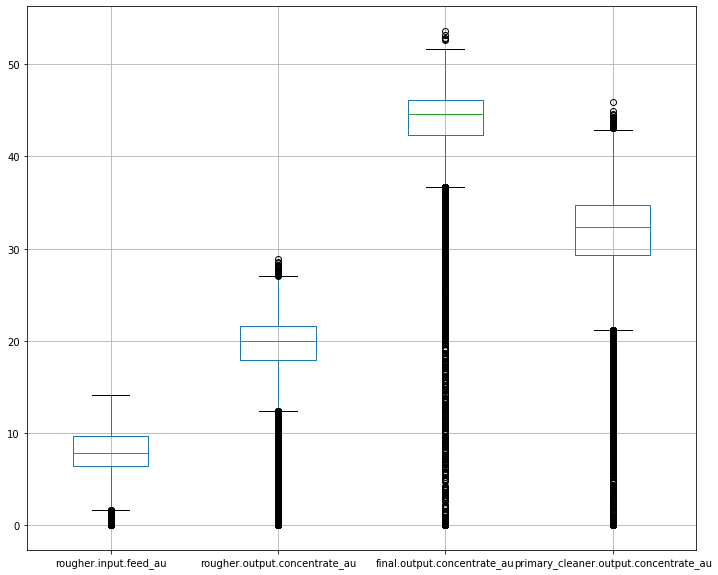

In [37]:
au_concentrat.boxplot(figsize = (12, 10))

#### Conclusion
Very small releases.

In [25]:
#delte release
gold_recovery_full_new_0 = gold_recovery_full.drop(gold_recovery_full[gold_recovery_full['final.output.concentrate_ag'] > 15].index)
gold_recovery_full_new_1 = gold_recovery_full_new_0.drop(gold_recovery_full_new_0[gold_recovery_full_new_0['rougher.output.concentrate_ag'] > 21].index)
gold_recovery_full_new_2 = gold_recovery_full_new_1.drop(gold_recovery_full_new_1[gold_recovery_full_new_1['primary_cleaner.output.concentrate_ag'] > 16].index)
gold_recovery_full_new_3 = gold_recovery_full_new_2.drop(gold_recovery_full_new_2[gold_recovery_full_new_2['primary_cleaner.output.concentrate_pb'] > 16].index)
gold_recovery_full_new_4 = gold_recovery_full_new_3.drop(gold_recovery_full_new_3[gold_recovery_full_new_3['rougher.output.concentrate_pb'] > 13.5].index)
gold_recovery_full_new_5 = gold_recovery_full_new_4.drop(gold_recovery_full_new_4[gold_recovery_full_new_4['final.output.concentrate_pb'] > 15].index)
gold_recovery_full_new_6 = gold_recovery_full_new_5.drop(gold_recovery_full_new_5[gold_recovery_full_new_5['final.output.concentrate_au'] > 51].index)
gold_recovery_full_new_7 = gold_recovery_full_new_6.drop(gold_recovery_full_new_6[gold_recovery_full_new_6['primary_cleaner.output.concentrate_au'] > 41].index)
gold_recovery_full_new = gold_recovery_full_new_7.reset_index(drop=True)

display(gold_recovery_full_new.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [26]:
#repeat for train
gold_recovery_train_new_0 = gold_recovery_train.drop(gold_recovery_train[gold_recovery_train['final.output.concentrate_ag'] > 15].index)
gold_recovery_train_new_1 = gold_recovery_train_new_0.drop(gold_recovery_train_new_0[gold_recovery_train_new_0['rougher.output.concentrate_ag'] > 21].index)
gold_recovery_train_new_2 = gold_recovery_train_new_1.drop(gold_recovery_train_new_1[gold_recovery_train_new_1['primary_cleaner.output.concentrate_ag'] > 16].index)
gold_recovery_train_new_3 = gold_recovery_train_new_2.drop(gold_recovery_train_new_2[gold_recovery_train_new_2['primary_cleaner.output.concentrate_pb'] > 16].index)
gold_recovery_train_new_4 = gold_recovery_train_new_3.drop(gold_recovery_train_new_3[gold_recovery_train_new_3['rougher.output.concentrate_pb'] > 13.5].index)
gold_recovery_train_new_5 = gold_recovery_train_new_4.drop(gold_recovery_train_new_4[gold_recovery_train_new_4['final.output.concentrate_pb'] > 15].index)
gold_recovery_train_new_6 = gold_recovery_train_new_5.drop(gold_recovery_train_new_5[gold_recovery_train_new_5['final.output.concentrate_au'] > 51].index)
gold_recovery_train_new_7 = gold_recovery_train_new_6.drop(gold_recovery_train_new_6[gold_recovery_train_new_6['primary_cleaner.output.concentrate_au'] > 41].index)
gold_recovery_train_new = gold_recovery_train_new_7.reset_index(drop=True)

display(gold_recovery_train_new.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_test
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


#### Conclusion  <a id='conclusion_4'></a>
What we can say:
- for silver and lead, all emissions at the stages of dispensing after flotation, first and final purification
- for gold, emissions only at the stages of issuance after the first and final cleanings
- for sol (what is this? Google jokes and says that salt. I found that this is some kind of concentrate) there are no emissions.
- it makes no sense to search and indicate for which substance the emissions are more or less, because the concentration is different.

The same for train.

[To contents](#contents)

# 3. Model<a id='model'></a>

### sMAPE<a id='smape'></a>

In [27]:
def sMAPE_1(fact, pred):
    n = len(fact)
    numerator = np.abs(fact - pred)
    denominator = (np.abs(fact) + np.abs(pred))/2
    summ = np.sum(numerator / denominator)
    sMAPE = (1/n) * summ 
    return sMAPE

def final_sMAPE_1(target, prediction):
    pred = pd.DataFrame(columns = list(target), data = prediction)
    final_fact = target['final.output.recovery'].reset_index(drop=True)
    final_pred = pred['final.output.recovery'].reset_index(drop=True)
    rougher_fact = target['rougher.output.recovery'].reset_index(drop=True)
    rougher_pred = pred['rougher.output.recovery'].reset_index(drop=True)
    
    final_sMAPE = 0.25 * sMAPE_1(rougher_fact, rougher_pred) + 0.75 * sMAPE_1(final_fact, final_pred)
    return final_sMAPE
from sklearn.metrics import make_scorer
scoring_smape = make_scorer(final_sMAPE_1, greater_is_better = True)

### Train<a id='models'></a>

In [28]:
#target
train_target = gold_recovery_train_new[{'final.output.recovery','rougher.output.recovery'}]
train_target['index'] = train_target.index
gold_recovery_test['index'] = gold_recovery_test.index
train_target['index'].loc[gold_recovery_test.index].reset_index(drop=True)
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16656 entries, 0 to 16655
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   final.output.recovery    16656 non-null  float64
 1   rougher.output.recovery  16656 non-null  float64
 2   index                    16656 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 390.5 KB


In [29]:
#rename
train_features = gold_recovery_train_new
#delete
train_features.drop(['rougher.output.concentrate_ag',           
                'rougher.output.tail_ag',
                'recovery_test',
                'rougher.output.concentrate_au',
                'primary_cleaner.output.tail_ag',
                'rougher.calculation.floatbank10_sulfate_to_au_feed',
                'final.output.tail_sol',
                'secondary_cleaner.output.tail_pb',
                'primary_cleaner.output.tail_au',
                'secondary_cleaner.output.tail_au',
                'primary_cleaner.output.tail_pb',
                'rougher.output.concentrate_pb',
                'final.output.concentrate_sol',
                'final.output.concentrate_pb',
                'rougher.output.tail_au',
                'final.output.concentrate_ag',
                'final.output.tail_au',
                'primary_cleaner.output.concentrate_au',
                'secondary_cleaner.output.tail_ag',
                'rougher.output.recovery',
                'final.output.tail_ag',
                'rougher.calculation.sulfate_to_au_concentrate',
                'rougher.output.concentrate_sol',
                'final.output.recovery',
                'primary_cleaner.output.concentrate_pb',
                'rougher.calculation.au_pb_ratio',
                'primary_cleaner.output.tail_sol',
                'primary_cleaner.output.concentrate_ag',
                'final.output.concentrate_au',
                'secondary_cleaner.output.tail_sol',
                'primary_cleaner.output.concentrate_sol',
                'rougher.output.tail_pb',
                'final.output.tail_pb',
                'rougher.output.tail_sol',
                'rougher.calculation.floatbank11_sulfate_to_au_feed'], axis='columns', inplace=True)
display(train_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16656 entries, 0 to 16655
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16656 non-null  object 
 1   primary_cleaner.input.sulfate               16656 non-null  float64
 2   primary_cleaner.input.depressant            16656 non-null  float64
 3   primary_cleaner.input.feed_size             16656 non-null  float64
 4   primary_cleaner.input.xanthate              16656 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16656 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16656 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16656 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16656 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16656 non-null  float64
 10  primary_cl

None

In [30]:
train_features['index'] = train_features.index
gold_recovery_test['index'] = gold_recovery_test.index
train_features['index'].loc[gold_recovery_test.index].reset_index(drop=True)
train_features.reset_index(drop=True)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,index
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,0
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,1
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,2
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,3
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16651,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,16651
16652,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,16652
16653,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,16653
16654,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,16654


In [31]:
#features&target
features = train_features.drop(['date','index'], axis=1)
target = train_target[['final.output.recovery','rougher.output.recovery']]

In [32]:
#cross validation Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)
final_score = cross_val_score(model, features, target, cv=5, scoring=scoring_smape).mean()
print(' Decision Tree Regressor:', final_score)

 Decision Tree Regressor: 0.3158699015444716


In [33]:
#cross validation Linear Regression
model = LinearRegression()
final_score = cross_val_score(model, features, target, cv=5,scoring=scoring_smape).mean()
print('Linear Regression:', final_score)

Linear Regression: 0.1697434181408492


In [34]:
#cross validation Random Forest Regressor
model = RandomForestRegressor(random_state=0)
final_score = cross_val_score(model, features, target, cv=5, scoring=scoring_smape).mean()
print('Random Forest Regressor:', final_score)

Random Forest Regressor: 0.1721652041636713


#### Conclusion  <a id='conclusion_6'></a>

DecisionTreeRegressor is win.0.32 is better result.
LinearRegression and RandomForestRegressor are 0.17 and 0.17.

[To contents](#contents)

### Test<a id='modeltest'></a>

In [35]:
#target
test_target_ = gold_recovery_full_new
test_target_['index'] = test_target_.index
gold_recovery_test['index'] = gold_recovery_test.index
test_target = pd.merge(test_target_, gold_recovery_test, on = 'index')

In [36]:
#feauters & target
features_test = gold_recovery_test.drop(['date', 'index'], axis=1)
target_test = test_target[['final.output.recovery','rougher.output.recovery']]

In [37]:
#check
model = DecisionTreeRegressor(random_state=0)
model.fit(features, target)
model.score(features_test, target_test)

-1.9334155206658314

### Final conclusion   <a id='contents_final'></a>
What we do.

***Check data:***
- check columns in test
- check recovery(normal)
- knew about flotation, primary, secondary and final stages

***Information about stages:***
- check concentra concentration of silver (down), gold (up) and lead (increases slightly) from flotation to final
- compared the sizes of granules of raw materials in different samples. We found out that they don't differ much, it's just a matter of the amount of substance
- посмотрели суммарную концентрацию всех веществ на разных стадиях и удалили сильные выбросы
- кстати, для sol(какая-то специфическая профессиональная штука типа смеси) выбросов вообще не было.

***Models:***
- check sMAPE
- Used LinearRegression, DecisionTreeRegressor и RandomForestRegressorс on train.
- DecisionTreeRegressor win
- Surprice on test DecisionTreeRegressor -1.93. It is not a mistace. We havent all data and do not know what is real.

[To contents](#contents)